In [3]:
from keras import models
from keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

In [4]:
import numpy as np

In [5]:
import livelossplot   # Helps us have a live look at the training of the model 
plot_losses = livelossplot.PlotLossesKeras()

%matplotlib inline

# Creating initial variables
NUM_ROWS = 28   
NUM_COLS = 28
NUM_CLASSES = 10
BATCH_SIZE = 128
EPOCHS = 10

In [6]:
# Function to show the current state of the dataset
def data_summary(X_train, y_train, X_test, y_test):
    print("Train images shape: ", X_train.shape)  # Gives you the shape of the data and the size of the images(*28 x 28)
    print("Train labels shape: ", y_train.shape)
    print("Test images shape: ", X_test.shape)
    print("Test labels shape: ", y_test.shape)
    print("Train labels: ", y_train)
    print("Test labels: ", y_test)

In [7]:
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Check state of the dataset
data_summary(X_train, y_train, X_test, y_test)

Train images shape:  (60000, 28, 28)
Train labels shape:  (60000,)
Test images shape:  (10000, 28, 28)
Test labels shape:  (10000,)
Train labels:  [5 0 4 ... 5 6 8]
Test labels:  [7 2 1 ... 4 5 6]


In [8]:
# X data is two dimensional((60000, 28,28) and (10000, 28,28))
# Reshape the data (Convert two dimensional data into one dimensional data)
X_train = X_train.reshape((X_train.shape[0], NUM_ROWS * NUM_COLS))
X_train = X_train.astype("float32") / 255  # Convert values to float values
X_test = X_test.reshape((X_test.shape[0], NUM_ROWS * NUM_COLS))
X_test = X_test.astype("float32")

In [9]:
# Categorically encode the labels
y_train = to_categorical(y_train, NUM_CLASSES)  # Converts the outputs to categorical data
y_test = to_categorical(y_test, NUM_CLASSES)

In [10]:
# Recheck the state of the dataset
data_summary(X_train, y_train, X_test, y_test)
# Train labels have now been converted to 0 or 1 for each number in the NUM_CLASSES output

Train images shape:  (60000, 784)
Train labels shape:  (60000, 10)
Test images shape:  (10000, 784)
Test labels shape:  (10000, 10)
Train labels:  [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
Test labels:  [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
# Building the neural network (adding layers)
# The dense layer is a neural network layer that is connected deeply, meaning each neuron in the dense layer receives
# input from all the neurons of its previous layer. In the background, the dense layer performs matrix-vector
# multiplication.
# The dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time.
# This helps prevent overfitting. Inputs not set to 0 are scaled up by (1/(1 - rate)) such that the sum over all inputs 
# is unchanged
model = models.Sequential()
model.add(Dense(512, activation = "relu", input_shape = (NUM_ROWS * NUM_COLS,))) # 512 nodes(First layer needs input shape)
model.add(Dropout(0.5))   # Drops half of the nodes during activation
model.add(Dense(256, activation = "relu"))  # Second layer has 256 nodes
model.add(Dropout(0.25))  # Drops one quarter of the nodes in this layer
model.add(Dense(10, activation = "softmax")) # Softmax gives the probability for each node in the output layer
# When you add up all these probabilities, they should add up to 1

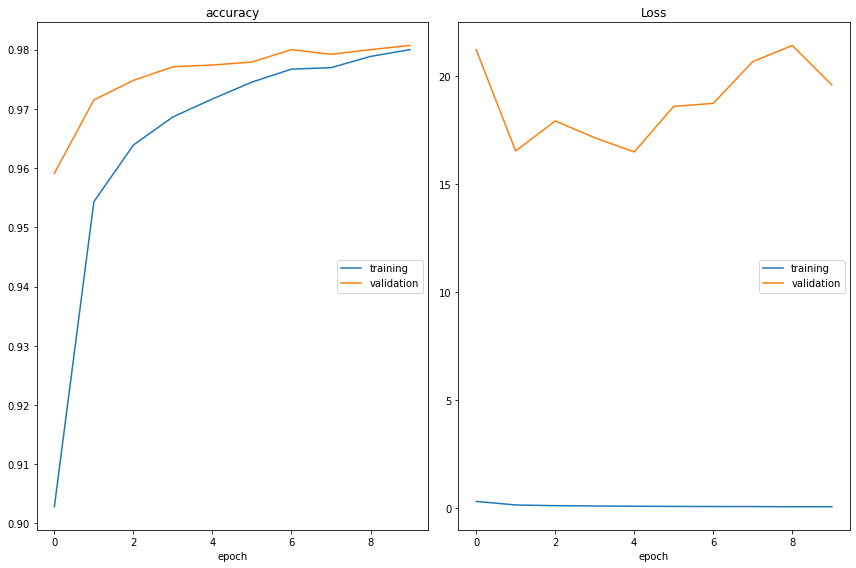

accuracy
	training         	 (min:    0.903, max:    0.980, cur:    0.980)
	validation       	 (min:    0.959, max:    0.981, cur:    0.981)
Loss
	training         	 (min:    0.073, max:    0.320, cur:    0.074)
	validation       	 (min:   16.493, max:   21.423, cur:   19.597)
469/469 [==============================] - 11s 23ms/step - loss: 0.0739 - accuracy: 0.9800 - val_loss: 19.5971 - val_accuracy: 0.9807
Test loss:  19.597143173217773
Test accuracy:  0.9807000160217285


In [12]:
# Compiling the model (Tunes up the model)
model.compile(optimizer = "rmsprop",
             loss = "categorical_crossentropy",
             metrics = ["accuracy"])

# Training the model
model.fit(X_train, y_train,
         batch_size = BATCH_SIZE,
         epochs = EPOCHS,
         callbacks = [plot_losses],
         verbose = 1,
         validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test, verbose = 0)
print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

In [13]:
# Summary of the neural network
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________
